In [16]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

from sklearn.impute import SimpleImputer


In [17]:
# Step 2: Load Dataset (Titanic_preprocessed)
# we have Titanic dataset in which lets suppose we have target column 'Survived'
df = pd.read_csv("titanic_preprocessed.csv")

X = df.drop("Survived", axis=1)
y = df["Survived"]

# Handle missing values (median imputation)
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)


In [18]:
# Step 3: Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]


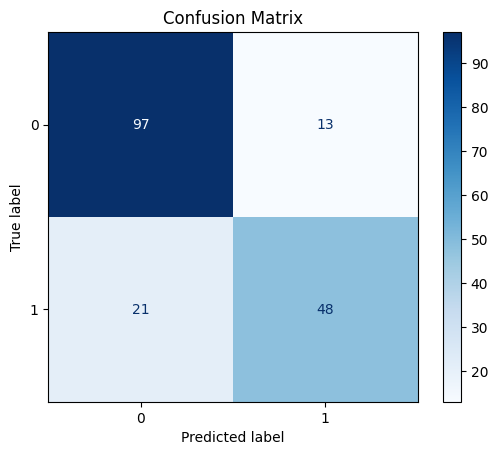

In [19]:
# Step 4: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [20]:
# Step 5: Custom Function to Compute Metrics
def compute_metrics_from_confusion_matrix(cm):
    TN, FP, FN, TP = cm.ravel()

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0.0
    npv = TN / (TN + FN) if (TN + FN) > 0 else 0.0
    fnr = FN / (TP + FN) if (TP + FN) > 0 else 0.0
    fpr = FP / (TN + FP) if (TN + FP) > 0 else 0.0

    return {
        "Accuracy": accuracy,
        "Recall (Sensitivity)": recall,
        "Precision": precision,
        "F1-score": f1_score,
        "Specificity": specificity,
        "Negative Predictive Value": npv,
        "False Negative Rate": fnr,
        "False Positive Rate": fpr,
        "True Positive": TP,
        "True Negative": TN,
        "False Positive": FP,
        "False Negative": FN,
    }

metrics = compute_metrics_from_confusion_matrix(cm)
for k, v in metrics.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")


Accuracy: 0.8101
Recall (Sensitivity): 0.6957
Precision: 0.7869
F1-score: 0.7385
Specificity: 0.8818
Negative Predictive Value: 0.8220
False Negative Rate: 0.3043
False Positive Rate: 0.1182
True Positive: 48
True Negative: 97
False Positive: 13
False Negative: 21


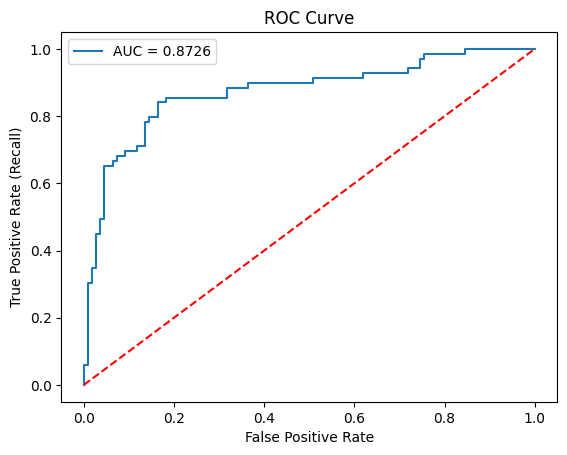

In [21]:
# Step 6: ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()
